In [5]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import keras
import tensorflow
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler


In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 423.1 kB/s eta 0:00:0000:0100:10
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 641.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 768.7 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 631.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 903.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━

In [17]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 586.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
#loading dataset

df = pd.read_csv(r'dc.csv')
df.head(10)

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
5,2021-01-25,120985.841280,32259.45,130795.200000,34875.00,119675.264000,31910.00,120966.151680,32254.20,88499
6,2021-01-24,120305.331200,32078.00,124029.478400,33071.00,115887.360000,30900.00,120987.528960,32259.90,57978
7,2021-01-23,123575.680000,32950.00,125473.382400,33456.00,117725.656064,31390.16,120305.331200,32078.00,64595
8,2021-01-22,115707.303296,30851.99,126863.018112,33826.53,108199.040000,28850.00,123557.565568,32945.17,142971
9,2021-01-21,133020.049792,35468.23,133514.240000,35600.00,112778.278400,30071.00,115700.327552,30850.13,131803


In [8]:
#Renaming the unnamed column with 'date' and setting index
df = df.rename(columns = {'Unnamed: 0' : 'Time'})
df['Time'] = pd.to_datetime(df['Time'])
df = df.iloc[::-1].set_index('Time')


In [9]:
#displaying the first 10 rows of updated dataset
df.head(10)

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
Time,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
2018-05-12,31525.637376,8405.94,32429.258752,8646.88,30577.011200,8153.00,31750.661376,8465.94,40241
2018-05-13,31786.290176,8475.44,32866.105344,8763.36,31120.819200,8298.00,32552.384384,8679.71,25632
2018-05-14,32552.384384,8679.71,33303.514496,8879.99,31042.060800,8277.00,32490.990336,8663.34,37389
2018-05-15,32491.102848,8663.37,33228.506496,8859.99,31508.235520,8401.30,31735.884800,8462.00,28126


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-05-07 to 2021-01-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1 KB


In [14]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


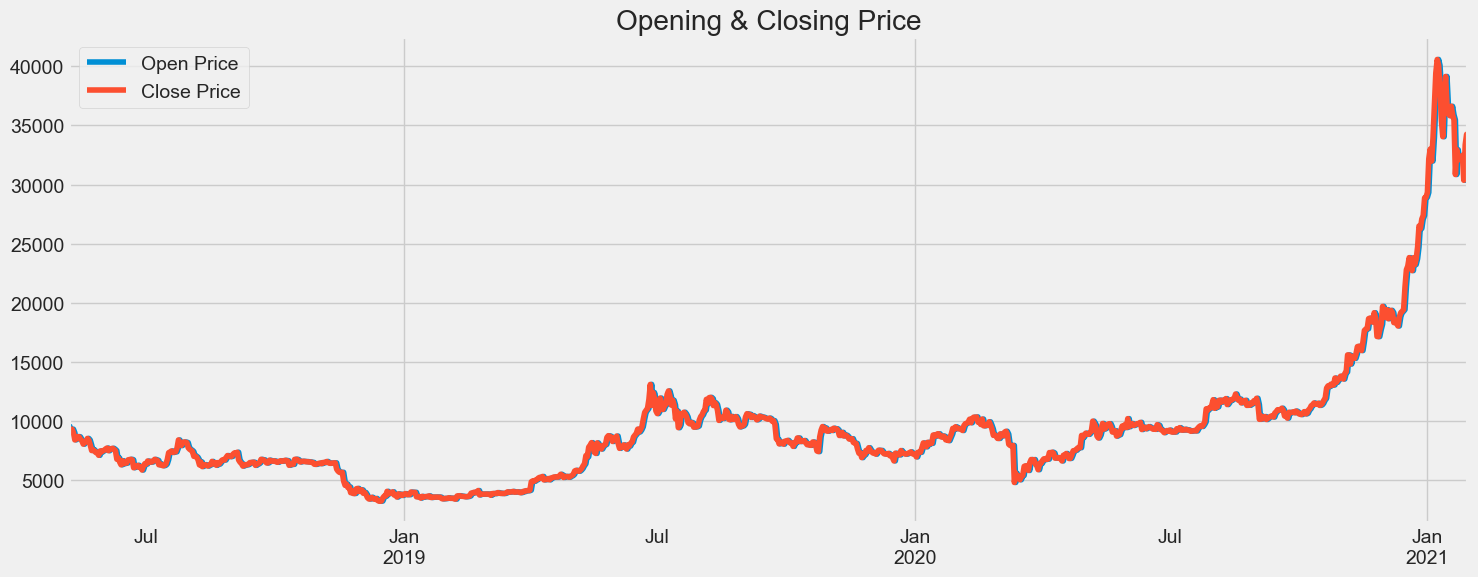

In [10]:
plt.figure(figsize=(15, 6))
df['open_USD'].plot()
df['close_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

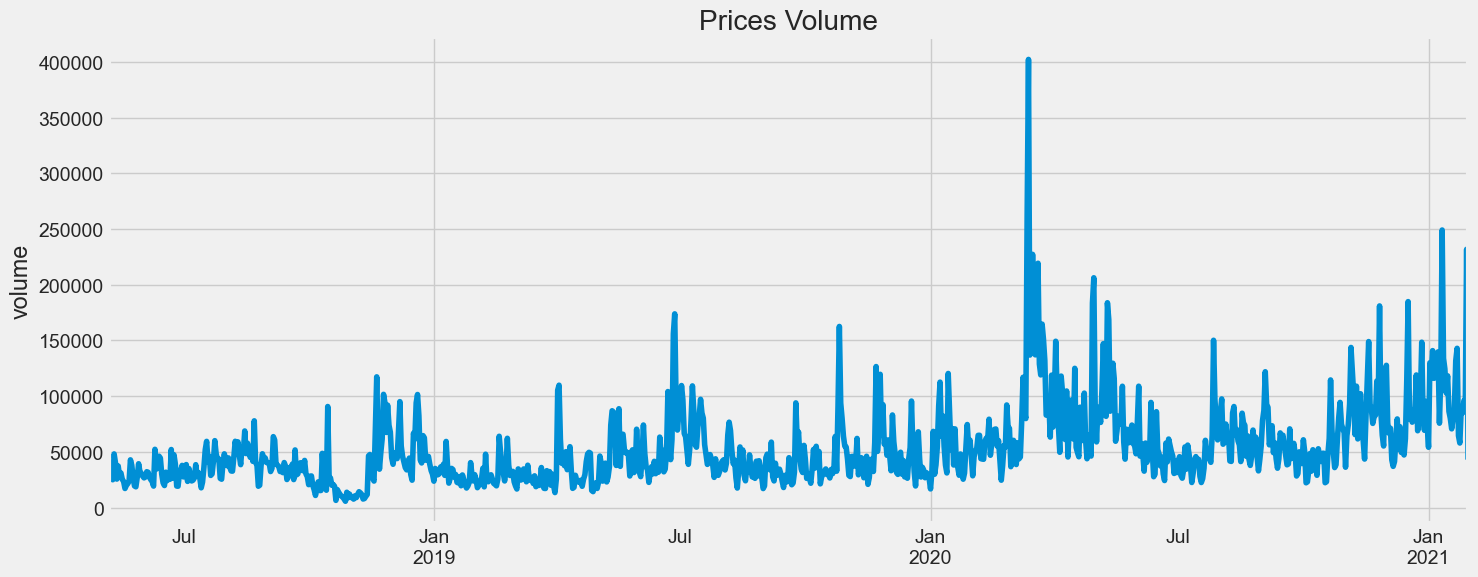

In [11]:
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title("Prices Volume")
plt.tight_layout()
plt.show()

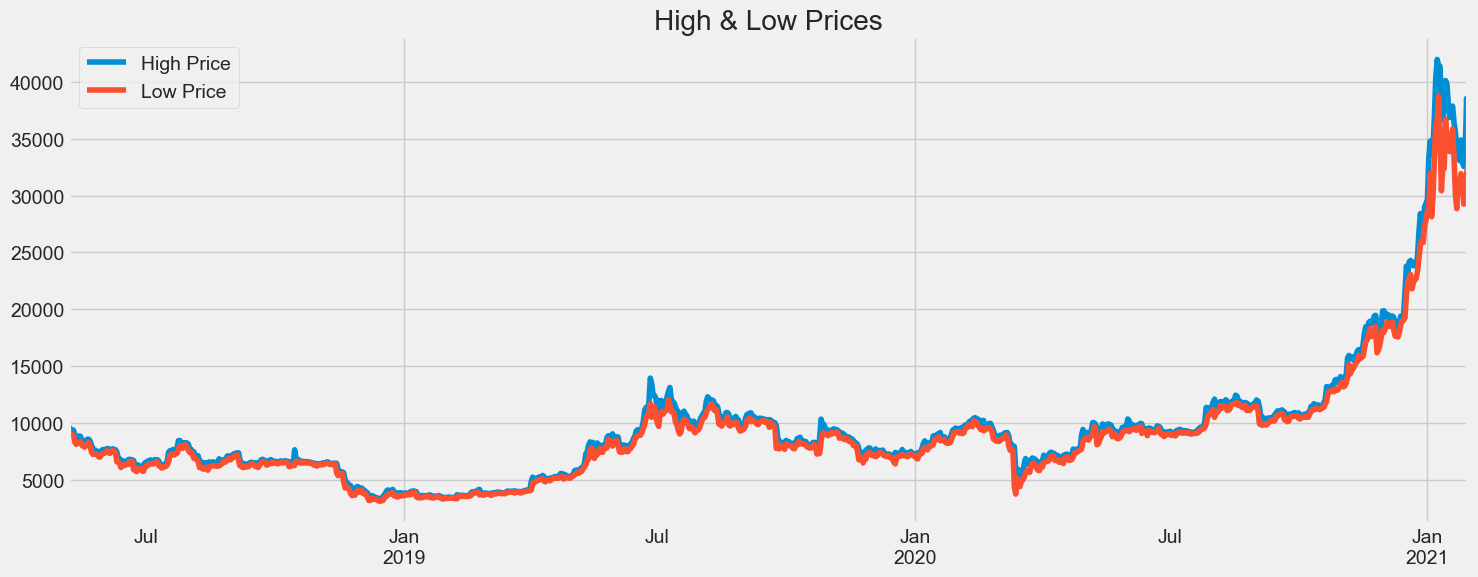

In [12]:
plt.figure(figsize=(15, 6))
df['high_USD'].plot()
df['low_USD'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Prices")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [13]:
# finding target
n_cols = 1
dataset = df["close_USD"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1000, 1)

In [14]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [15]:
# Splitting the dataset into train and test
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 750 Test Size : 250


In [16]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(750, 1)

In [17]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.16465348],
       [0.15990542],
       [0.16318175],
       [0.15494544],
       [0.13883138],
       [0.14059585],
       [0.14631604],
       [0.145878  ],
       [0.14049042],
       [0.13695827],
       [0.12923733],
       [0.13454491],
       [0.1343758 ],
       [0.14222919],
       [0.13832939],
       [0.12751541],
       [0.11480077],
       [0.11675576],
       [0.11359797],
       [0.11030559],
       [0.11044018],
       [0.10401837],
       [0.11371277],
       [0.11142945],
       [0.11434748],
       [0.11531079],
       [0.11849561],
       [0.1204819 ],
       [0.11440073],
       [0.11809342],
       [0.11899894],
       [0.11986164],
       [0.11751651],
       [0.1145273 ],
       [0.09508072],
       [0.09794416],
       [0.0887927 ],
       [0.08244501],
       [0.09162858],
       [0.08501705],
       [0.08756127],
       [0.08664157],
       [0.09367508],
       [0.0944444 ],
       [0.0949876 ],
       [0.0938458 ],
       [0.07581475],
  

In [18]:
#converting into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [20]:
x_train.shape , y_train.shape

((690, 60, 1), (690, 1))

### LSTM Model

In [21]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:

# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
22/22 [==============================] - 1s 16ms/step - loss: 0.0023 - mean_absolute_error: 0.0374
Epoch 2/100
22/22 [==============================] - 0s 16ms/step - loss: 4.4015e-04 - mean_absolute_error: 0.0152
Epoch 3/100
22/22 [==============================] - 0s 16ms/step - loss: 3.2219e-04 - mean_absolute_error: 0.0126
Epoch 4/100
22/22 [==============================] - 0s 16ms/step - loss: 2.9466e-04 - mean_absolute_error: 0.0119
Epoch 5/100
22/22 [==============================] - 0s 17ms/step - loss: 2.6847e-04 - mean_absolute_error: 0.0116
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 2.4345e-04 - mean_absolute_error: 0.0108
Epoch 7/100
22/22 [==============================] - 0s 17ms/step - loss: 2.4108e-04 - mean_absolute_error: 0.0109
Epoch 8/100
22/22 [==============================] - 0s 17ms/step - loss: 2.3654e-04 - mean_absolute_error: 0.0110
Epoch 9/100
22/22 [==============================] - 0s 17ms/step - loss: 2.1781e-04

### Model Evaluation

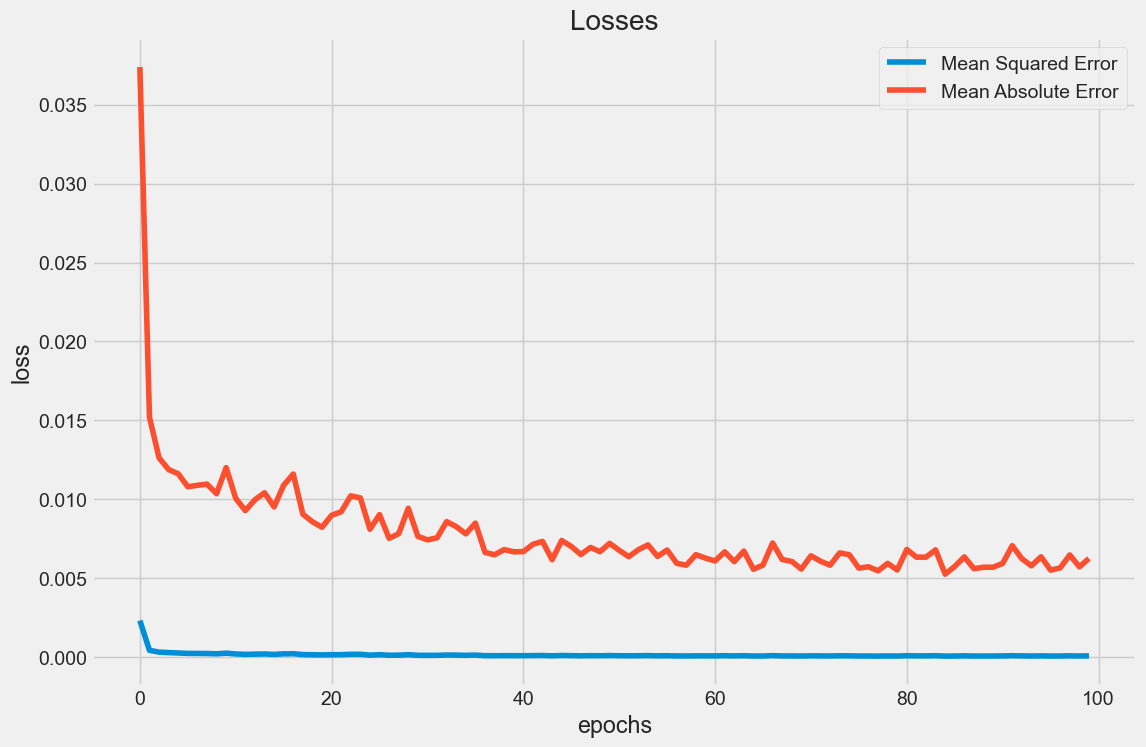

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction

In [25]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [26]:
x_test.shape , y_test.shape

((250, 60, 1), (250, 1))

In [27]:
# Get Prediction
predictions = model.predict(x_test)

8/8 [==============================] - 0s 5ms/step


In [28]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(250, 1)

In [29]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

596.65

In [30]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,8883.225586,8841.18
1,8882.579102,9204.07
2,9183.258789,9575.89
3,9572.606445,9427.07
4,9521.580078,9697.72
...,...,...
245,29832.677734,32467.77
246,30040.074219,30366.15
247,27793.449219,33364.86
248,31055.640625,34252.20


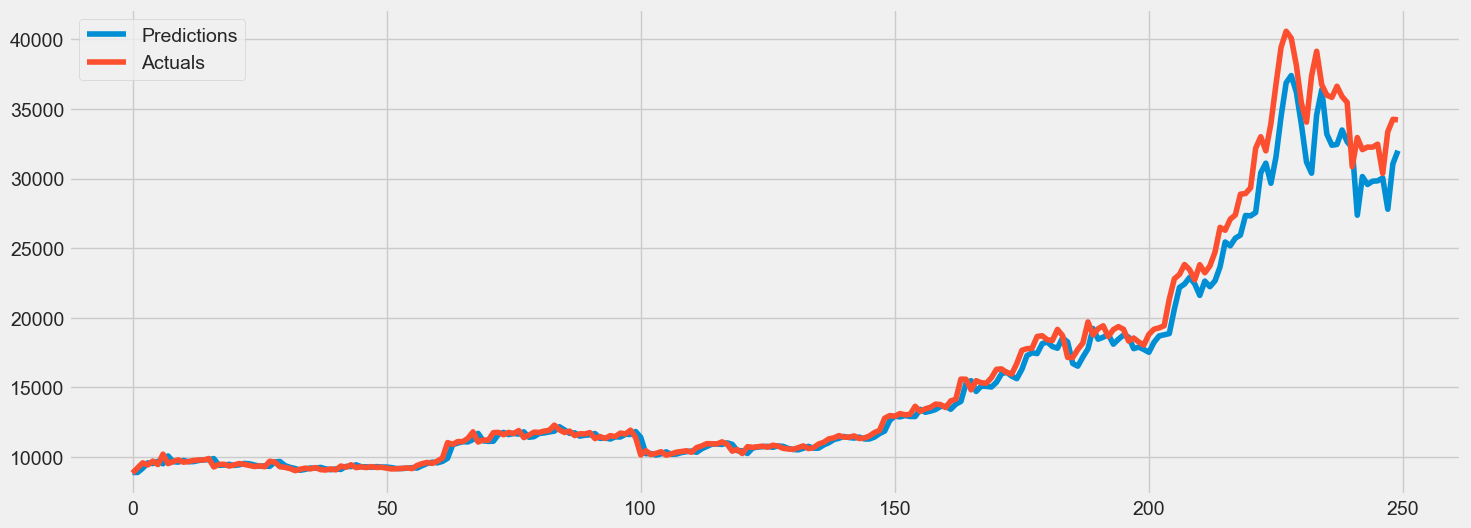

In [31]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize predictions with the data for one feature

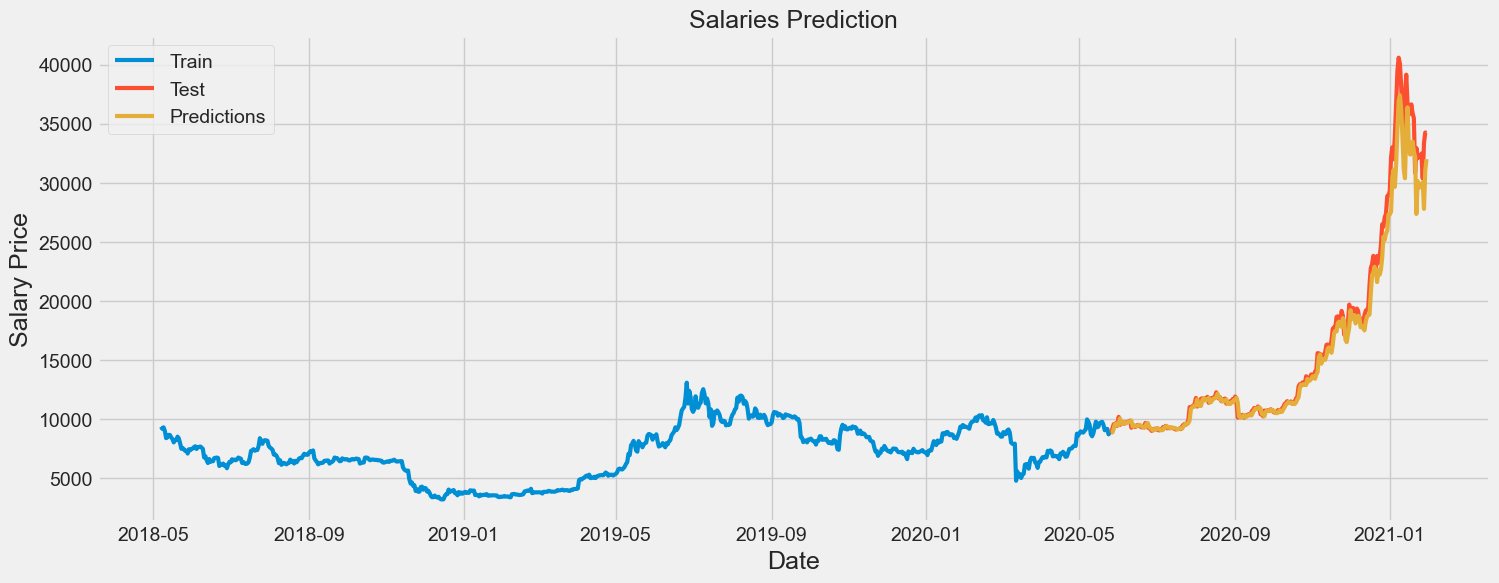

In [32]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Salaries Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Salary Price', fontsize= 18)
plt.plot(train['close_USD'], linewidth= 3)
plt.plot(test['close_USD'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

### Multivariate Predictions

In [33]:
# feature Selection

n_cols = 4
cols = list(df.loc[:, ['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1000, 5)

In [34]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [35]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 750 Test Size : 250


In [36]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(750, 5)

In [37]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 5

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.17255564, 0.16582854, 0.16940682, 0.16465348, 0.07073637],
       [0.16463542, 0.16029581, 0.16601966, 0.15990542, 0.04991702],
       [0.15963211, 0.15807982, 0.16333322, 0.16318175, 0.05027014],
       [0.16316386, 0.15821221, 0.16347381, 0.15494544, 0.04871134],
       [0.15492873, 0.1484298 , 0.14578725, 0.13883138, 0.10715889],
       [0.13897512, 0.1388646 , 0.14050097, 0.14059585, 0.08701552],
       [0.14083464, 0.14187648, 0.14457816, 0.14631604, 0.05016673],
       [0.14630002, 0.14489224, 0.14398767, 0.145878  , 0.07982182],
       [0.14586284, 0.14437509, 0.1474828 , 0.14049042, 0.05645743],
       [0.14047505, 0.13475636, 0.13853296, 0.13695827, 0.06403453],
       [0.1369433 , 0.13413578, 0.13560835, 0.12923733, 0.04967992],
       [0.12915258, 0.12920243, 0.13372159, 0.13454491, 0.04472857],
       [0.13448204, 0.13224301, 0.13889062, 0.1343758 , 0.02888074],
       [0.13436111, 0.13788512, 0.14080746, 0.14222919, 0.03585247],
       [0.14221336, 0.1

In [38]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [39]:

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [40]:
x_train.shape , y_train.shape

((690, 60, 5), (690, 5))

In [41]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            11200     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 43333 (169.27 KB)
Trainable params: 43333 (169.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
22/22 [==============================] - 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0416
Epoch 2/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0015 - mean_absolute_error: 0.0226
Epoch 3/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_absolute_error: 0.0192
Epoch 4/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0013 - mean_absolute_error: 0.0185
Epoch 5/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0012 - mean_absolute_error: 0.0187
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0012 - mean_absolute_error: 0.0177
Epoch 7/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0011 - mean_absolute_error: 0.0170
Epoch 8/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0011 - mean_absolute_error: 0.0175
Epoch 9/100
22/22 [==============================] - 1s 17ms/step - loss: 0.0011 - mean_absolute_error: 0.0166
E

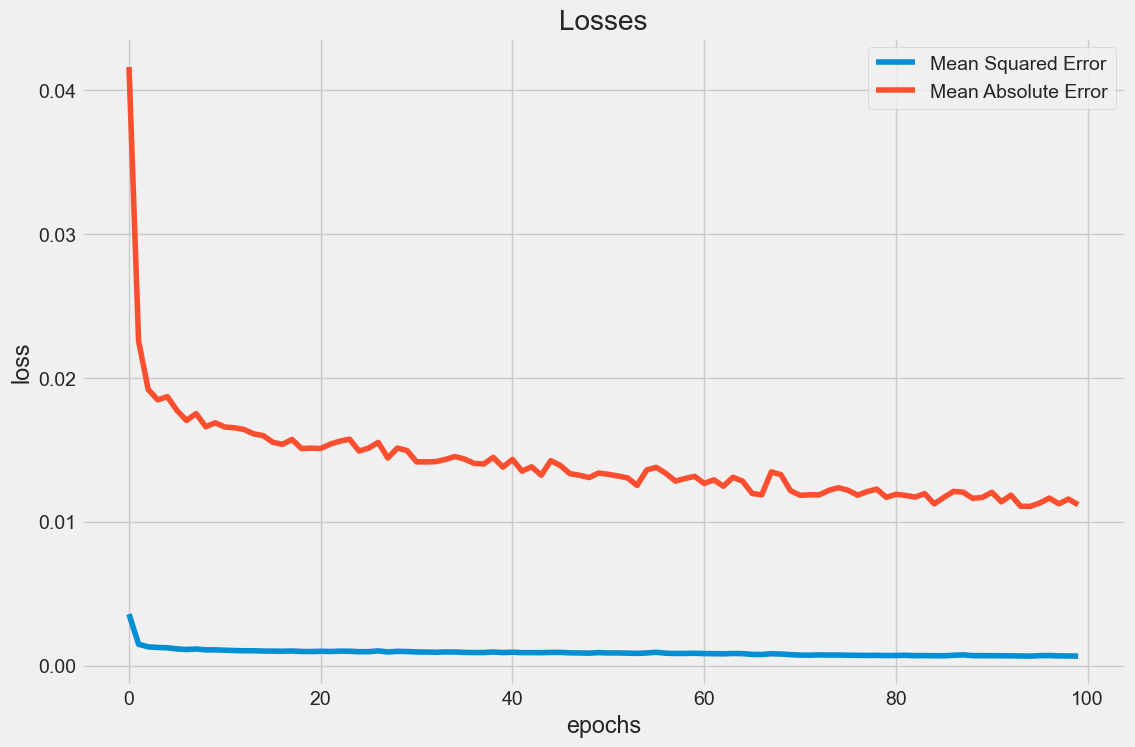

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction on test dataset

In [45]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

In [46]:
x_test = []
y_test = []
n_cols = 5

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [47]:
x_test.shape , y_test.shape

((250, 60, 5), (250, 5))

In [48]:
# Get Prediction
predictions = model2.predict(x_test)

8/8 [==============================] - 0s 5ms/step


In [49]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(250, 5)

In [50]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [51]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

877.88